In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.5. Cluster Variable Averages')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.5. Cluster Variable Averages/Output')
cur_date = "033123"

library(readxl)
library(tidyverse)
library(reshape2)
library(tidytext)
library(rcartocolor)
library(MetBrewer)
library(cowplot)
library(scales)
library(ggtext)

# reading in files
ejscreen_cluster_df = data.frame(read_excel("Input/GEO_ID_Sociodemographic_Clusters_030123.xlsx"))
housing_df = data.frame(read_excel("Input/Imputed_Housing_Data_030923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
head(ejscreen_cluster_df)
head(housing_df)

,GEO_ID,Census_Tract,County,Variables,Value,Scaled_Value,Cluster
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201,Alamance,Population_Under_5,9.5,1.45508797,3
2,14000US37001020100,201,Alamance,Population_Over_65,15.1,-0.20849618,3
3,14000US37001020100,201,Alamance,Race_Non_White,39.0,0.33121718,3
4,14000US37001020100,201,Alamance,Hispanic_Latino,9.5,0.04837140,3
5,14000US37001020100,201,Alamance,Non_Proficient_English_Speakers,3.9,-0.09907552,3
6,14000US37001020100,201,Alamance,Poverty_Overall,27.2,1.07521173,3


,GEO_ID,Census_Tract,County,Total_Housing_Units,Housing_Density,Total_Occupied_Housing_Units,Total_Owner_Occupied_Housing_Units,Median_Year_Structure_Built,Owner_Occupied_Housing_Units_Less_than_HPI,Median_House_Value,Median_Gross_Rent,Median_Gross_Rent_Percentage_of_Household_Income
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201.00,Alamance,2006,31.54848,1757,851,1949,824,149600,614,27.9
2,14000US37001020200,202.00,Alamance,1943,26.03618,1675,881,1961,881,83400,609,31.5
3,14000US37001020300,203.00,Alamance,3254,71.60011,2930,2015,1971,1980,91500,763,37.7
4,14000US37001020400,204.00,Alamance,2590,53.47674,2327,1510,1974,1487,96900,659,34.3
5,14000US37001020501,205.01,Alamance,1435,122.03583,1280,990,1973,932,137400,584,46.7
6,14000US37001020502,205.02,Alamance,1484,471.34609,1275,666,1980,666,73500,672,35.9


Plotting the average scaled value for each variable within each cluster to visualize the magnitude and directionality of each variable.

In [3]:
# combining each into 1 df
# ejscreen
averaged_ejscreen_df = ejscreen_cluster_df %>%
    # averaging values for each variable within each cluster
    group_by(Cluster, Variables) %>%
    summarize(Avg_Scaled_Value = mean(Scaled_Value), Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Scaled_Value, .by_group = TRUE) %>%
    ungroup() %>%
    # cleaning variable names here
    mutate(Variables = ifelse(Variables == "Non_Proficient_English_Speakers", "Non-proficient English Speakers",
                                  ifelse(Variables == "Less_than_High_School", "Less than High School Education",
                                      ifelse(Variables == "Population_Over_65", "Over 65 Years Old",
                                         ifelse(Variables == "Population_Under_5", "Under 5 Years Old",
                                             ifelse(Variables == "Hispanic_Latino", "Hispanic and/or Latino",
                                                ifelse(Variables == "Poverty_Overall", "Below Federal Poverty Level",
                                                    ifelse(Variables == "Race_Non_White", "Non-White Population",
                                                           ifelse(Variables == "Unemployed", Variables,
                             NA)))))))))

# ejscreen_df$Variable = as.character(ejscreen_df$Variable)
averaged_ejscreen_df$Cluster = as.character(averaged_ejscreen_df$Cluster)

head(averaged_ejscreen_df)

`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


Cluster,Variables,Avg_Scaled_Value,Avg_Value
<chr>,<chr>,<dbl>,<dbl>
1,Over 65 Years Old,0.3058091,18.997422
1,Under 5 Years Old,-0.2717533,5.043984
1,Non-proficient English Speakers,-0.3493582,2.610937
1,Unemployed,-0.3635031,4.332424
1,Hispanic and/or Latino,-0.3789516,5.873047
1,Less than High School Education,-0.3838343,19.530495


# EJ Screen Cluster Variables

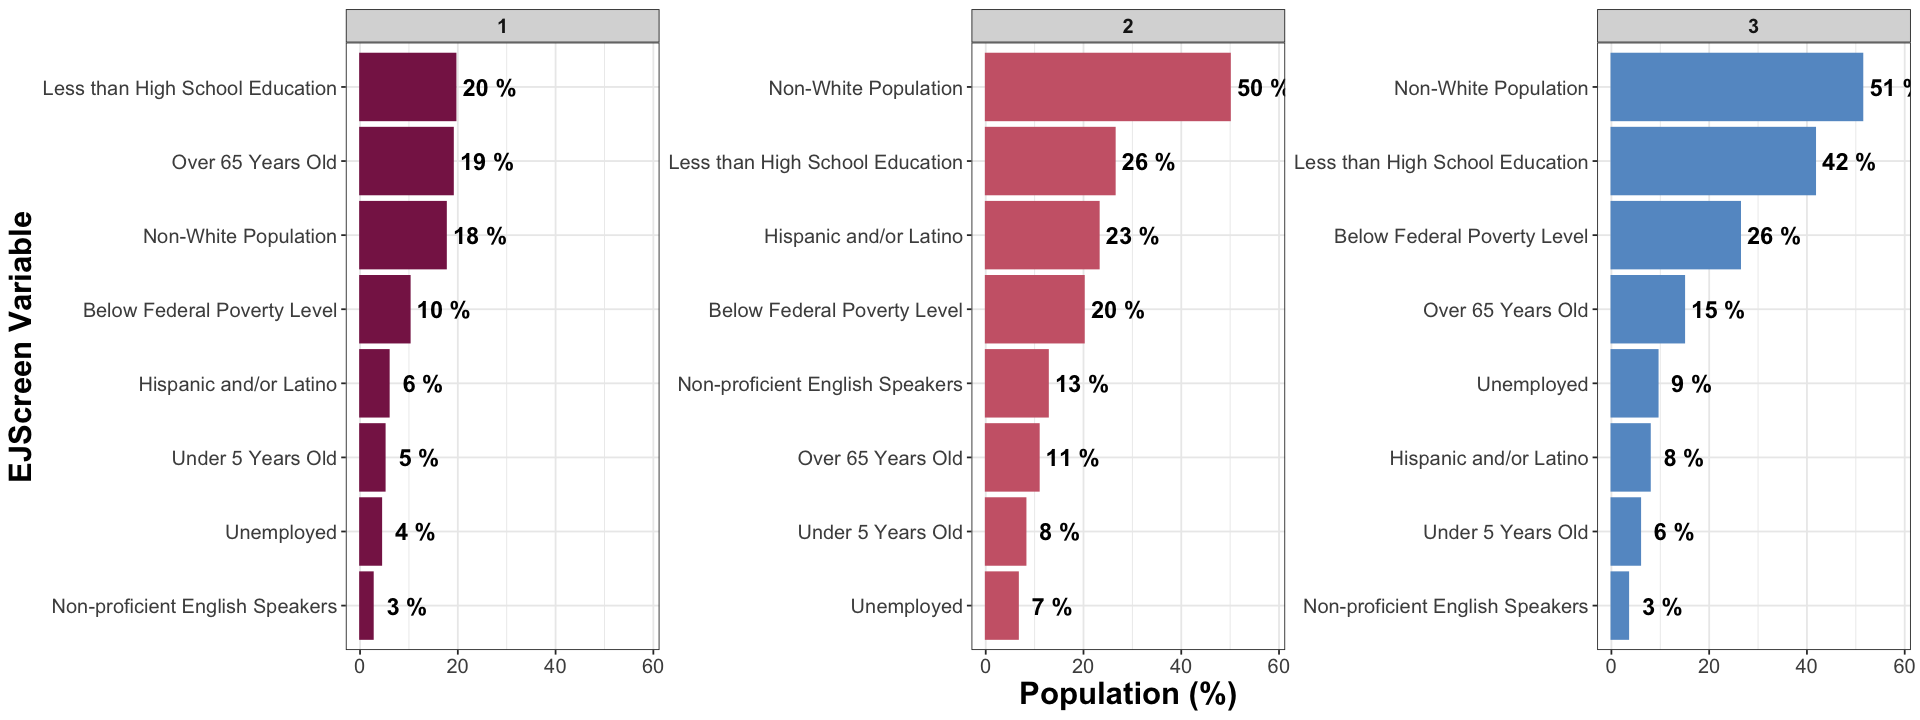

In [4]:
options(repr.plot.width = 16, repr.plot.height = 6) #changing size

# getting color palette
prism_colors = carto_pal(12, "Safe")

FigureS1a = ggplot() + 
  geom_col(data = averaged_ejscreen_df, aes(x = Avg_Value, 
                                            y = reorder_within(Variables, Avg_Value, Cluster), 
                                            color = Cluster, fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = averaged_ejscreen_df, aes(x = Avg_Value + 7, label = paste(round(Avg_Value),"%"), 
                y = reorder_within(Variables, Avg_Value, Cluster)), fontface = "bold", size = 5) +
 
  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = prism_colors[c(9,2,11)]) +
  scale_fill_manual(values = prism_colors[c(9,2,11)]) +

  labs(y = 'EJScreen Variable', x = "Population (%)")

FigureS1a

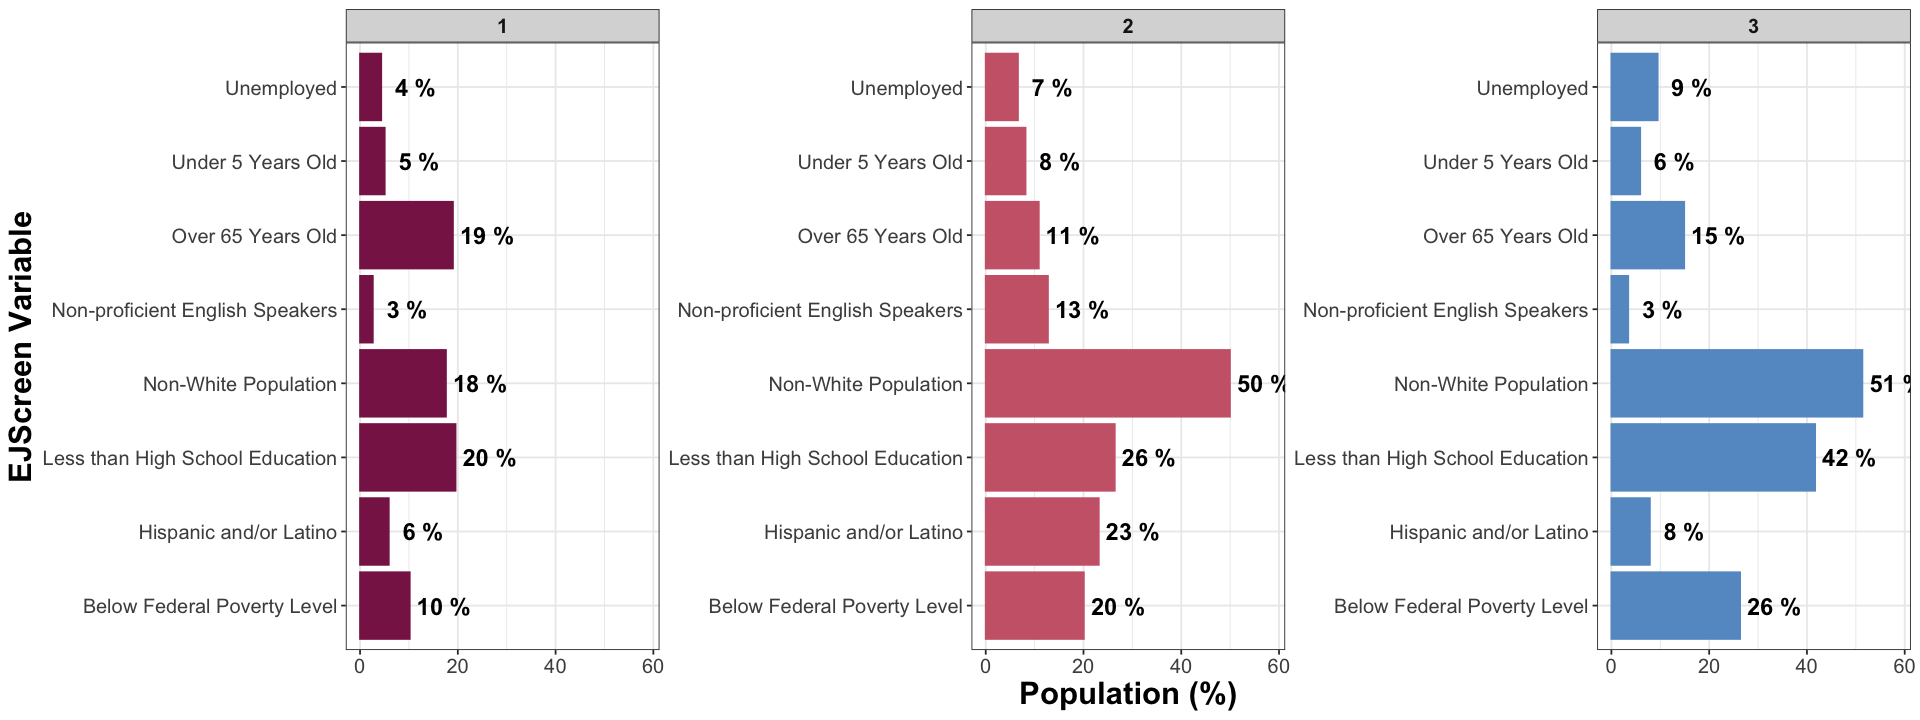

In [5]:
FigureS1b = ggplot() + 
  geom_col(data = averaged_ejscreen_df, aes(x = Avg_Value, y = Variables, 
                                            color = Cluster, fill = Cluster)) + 

 # adding in original values for clarity
  geom_text(data = averaged_ejscreen_df, aes(x = Avg_Value + 7, label = paste(round(Avg_Value),"%"), 
                y = Variables), fontface = "bold", size = 5) +

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = prism_colors[c(9,2,11)]) +
  scale_fill_manual(values = prism_colors[c(9,2,11)]) +

  labs(y = 'EJScreen Variable', x = "Population (%)")

FigureS1b

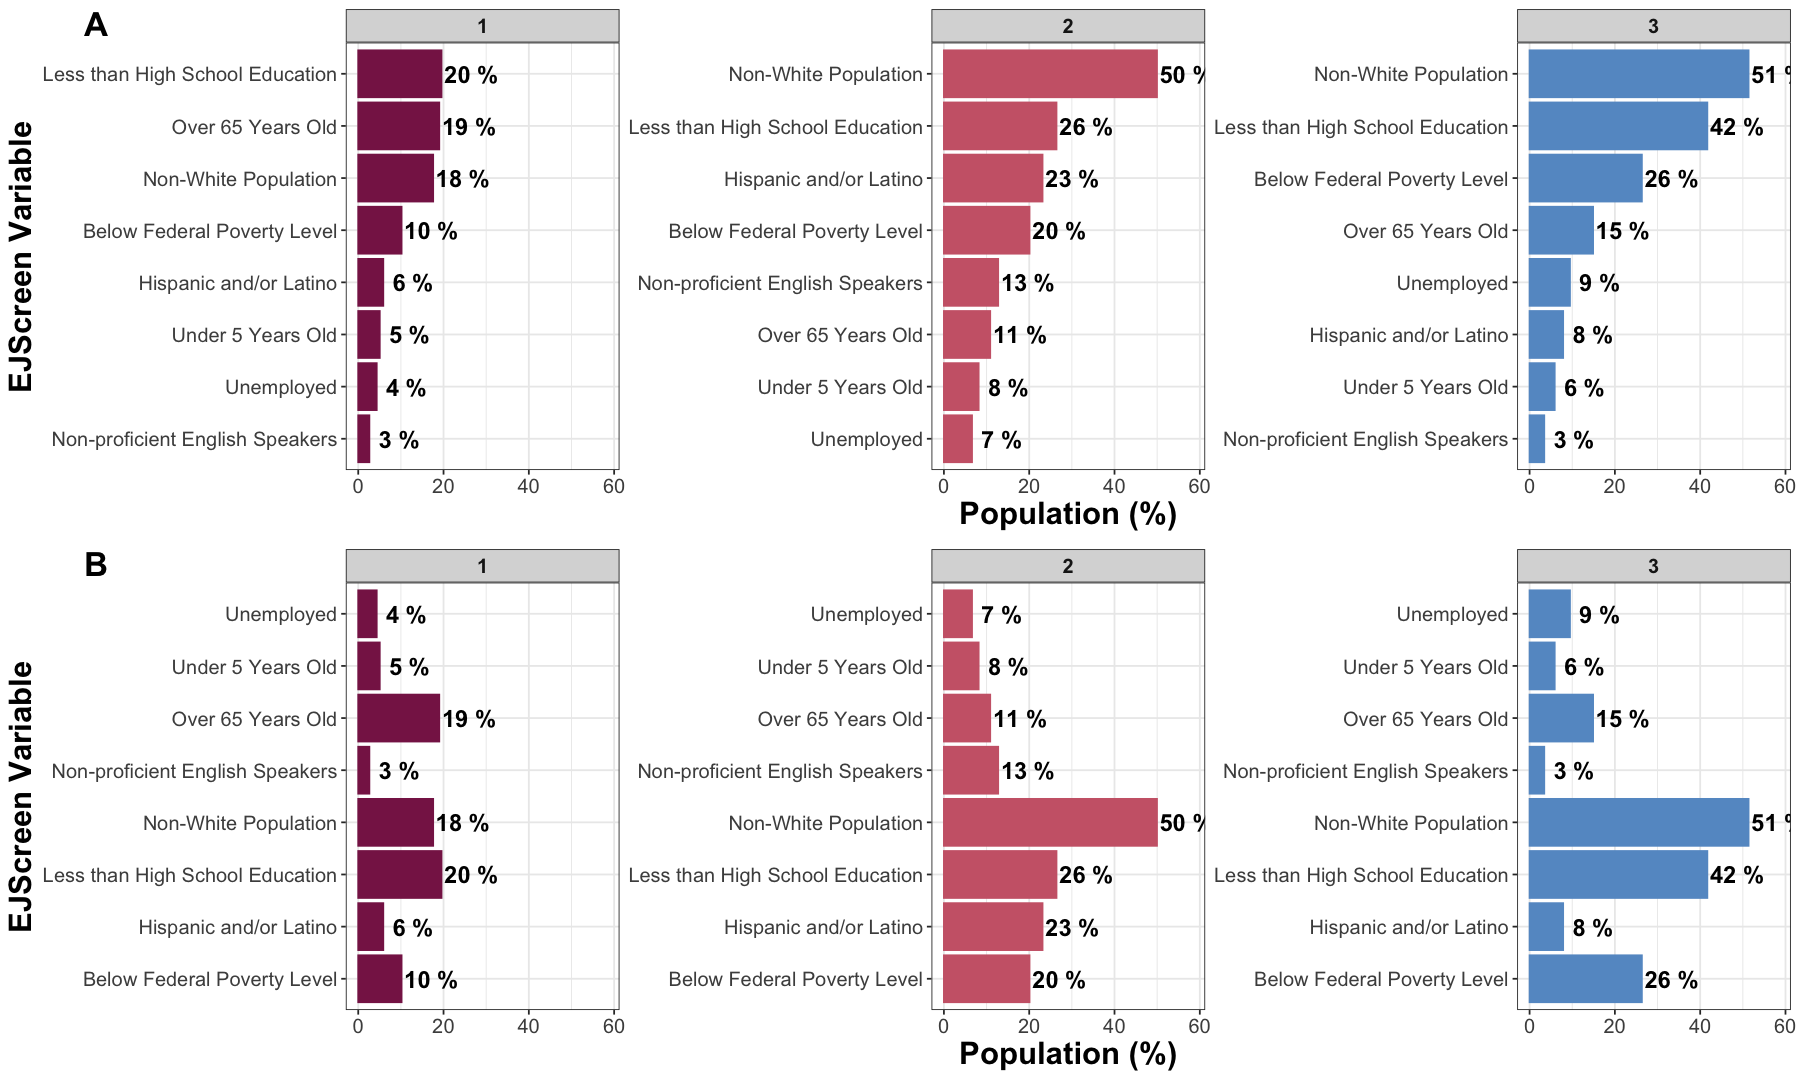

In [6]:
options(repr.plot.width = 15, repr.plot.height = 9) #changing size
FigureS1 = plot_grid(FigureS1a, FigureS1b, ncol = 1,
                            # adding labels, changing size their size and position
                            labels = "AUTO", label_size = 20, label_x = 0.04)
FigureS1

# Housing Cluster Variables

In [7]:
# first assigning geo ids to ejscreen clusters based on housing data
# starting by making the housing df into a wide format
# selecting variables we're interested in
housing_indicators = c("Housing_Density", "Median_House_Value")

longer_housing_df = housing_df %>%
                                 pivot_longer(cols = c(4:12), names_to = "Variables", values_to = "Value") %>%
    filter(Variables %in% housing_indicators)
head(longer_housing_df)

GEO_ID,Census_Tract,County,Variables,Value
<chr>,<dbl>,<chr>,<chr>,<dbl>
14000US37001020100,201,Alamance,Housing_Density,31.54848
14000US37001020100,201,Alamance,Median_House_Value,149600.00000
14000US37001020200,202,Alamance,Housing_Density,26.03618
14000US37001020200,202,Alamance,Median_House_Value,83400.00000
14000US37001020300,203,Alamance,Housing_Density,71.60011
14000US37001020300,203,Alamance,Median_House_Value,91500.00000


In [8]:
# starting by creating 1 df
housing_ejscreen_clusters_df = inner_join(ejscreen_cluster_df[,c(1,7)], longer_housing_df) %>%
    # scaling within each variable first
    group_by(Variables) %>%
    mutate(Scaled_Value = scale(Value)) %>%
    ungroup() %>%
    # averaging values for each variable within each cluster
    group_by(Cluster, Variables) %>%
    summarize(Avg_Scaled_Value = mean(Scaled_Value), Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Scaled_Value, .by_group = TRUE) %>%
    ungroup() %>%
    # cleaning variable names here
    mutate(Variables = ifelse(Variables == "Housing_Density", "Housing Density",
                                  ifelse(Variables == "Median_House_Value", "Median House Value", NA)))  

# need to change cluster col into a character for ggplot
housing_ejscreen_clusters_df$Cluster = as.character(housing_ejscreen_clusters_df$Cluster)
           
head(housing_ejscreen_clusters_df)

Joining, by = "GEO_ID"
`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


Cluster,Variables,Avg_Scaled_Value,Avg_Value
<chr>,<chr>,<dbl>,<dbl>
1,Median House Value,0.27098655,196823.1078
1,Housing Density,0.02640746,674.9886
2,Housing Density,-0.14465816,494.6583
2,Median House Value,-0.34913804,132127.0296
3,Housing Density,0.02896017,677.6795
3,Median House Value,-0.40927717,125852.8613


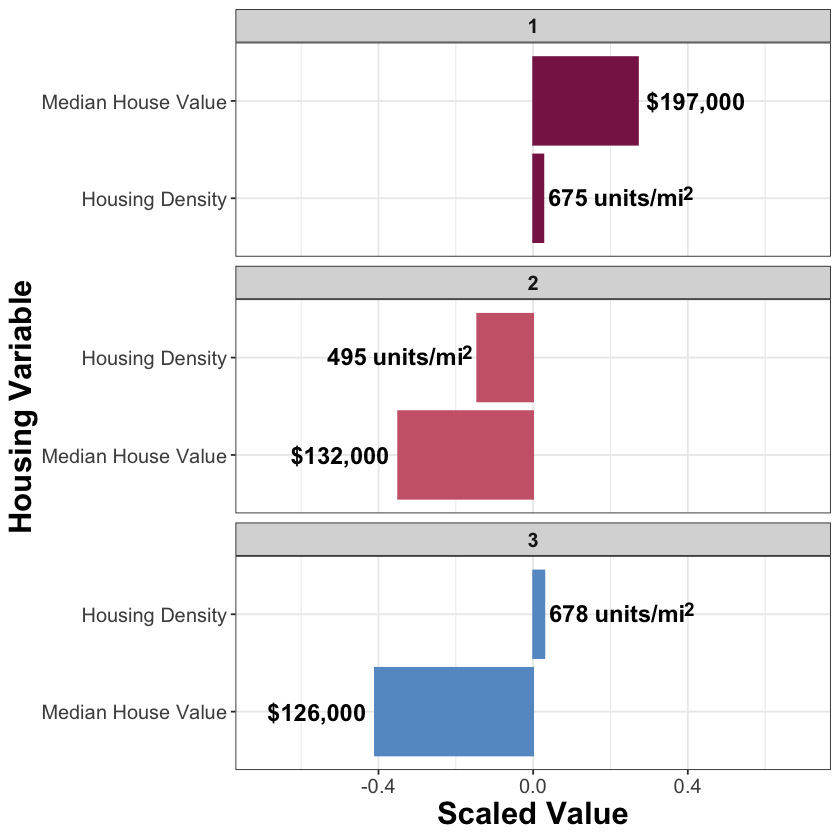

In [9]:
options(repr.plot.width = 7, repr.plot.height = 7) #changing size

# getting color palette
peru_palette = MetPalettes$Kandinsky[[1]]

Figure4 = ggplot(data = housing_ejscreen_clusters_df) + 
  geom_col(aes(x = Avg_Scaled_Value, y = reorder_within(Variables, Avg_Scaled_Value, Cluster), color = Cluster, 
               fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = housing_ejscreen_clusters_df %>%
                filter(Variables == "Median House Value", Avg_Scaled_Value > 0), 
            aes(x = Avg_Scaled_Value + 0.15, label = dollar(round(Avg_Value, digits = -3)), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = housing_ejscreen_clusters_df %>%
                filter(Variables == "Median House Value", Avg_Scaled_Value < 0), 
            aes(x = Avg_Scaled_Value - 0.15, label = dollar(round(Avg_Value, digits = -3)), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_richtext(data = housing_ejscreen_clusters_df %>%
                 filter(Variables == "Housing Density", Avg_Scaled_Value > 0), size = 5, fontface = "bold",
                aes(x = Avg_Scaled_Value + 0.2,  y = reorder_within(Variables, Avg_Scaled_Value, Cluster), 
                                                label = paste0(round(Avg_Value), " units/mi<sup>2</sup>")),
                fill = NA, label.color = NA) + # remove background and outline
  geom_richtext(data = housing_ejscreen_clusters_df %>%
                 filter(Variables == "Housing Density", Avg_Scaled_Value < 0), size = 5, fontface = "bold",
                aes(x = Avg_Scaled_Value - 0.2,  y = reorder_within(Variables, Avg_Scaled_Value, Cluster), 
                                                label = paste0(round(Avg_Value), " units/mi<sup>2</sup>")),
                fill = NA, label.color = NA) + # remove background and outline

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster, scales = 'free_y', ncol = 1) + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend
  xlim(-0.7,0.7) +

  scale_color_manual(values = prism_colors[c(9,2,11)]) +
  scale_fill_manual(values = prism_colors[c(9,2,11)]) +

  labs(y = 'Housing Variable', x = "Scaled Value")

Figure4

In [10]:
# exporting data
write.csv(averaged_ejscreen_df, paste0(Output,"/", cur_date, "_EJScreen_Cluster_Averages.csv"), row.names = FALSE)

In [11]:
# exporting figures
ggsave(FigureS1, 
       filename = 'FigureS1.pdf',
       path = Output,
       # need to respecify dimensions here when exporting figures
       width = 15, height = 9)

# exporting figures
ggsave(Figure4, 
       filename = 'Figure4.pdf',
       path = Output,
       # need to respecify dimensions here when exporting figures
       width = 7, height = 7)